<a href="https://colab.research.google.com/github/soconzan/2024-2-dl/blob/main/cnn_ResNet50_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

### 학습 데이터 로드 및 데이터 전처리

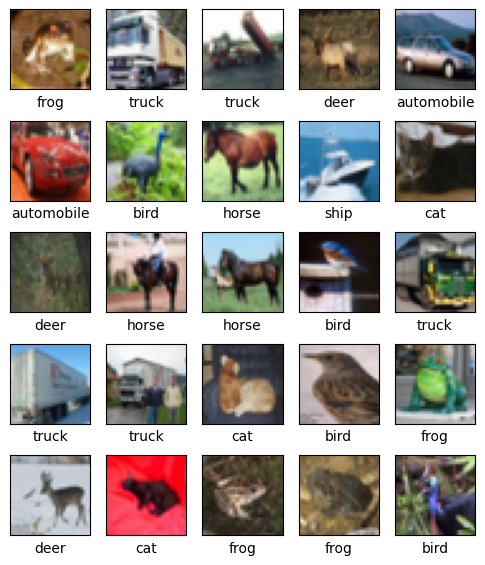

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 클래스 레이블
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 9개 시각화
plt.figure(figsize=(6,7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# 데이터 전처리 - 이미지 데이터 정규화 (0~255 범위의 값을 0~1로 변경)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 라벨을 One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 데이터 증강

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train)

### 모델-5

In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # 드롭아웃 층 추가
model.add(layers.Dense(10, activation='softmax'))

# 학습률 스케줄링 함수 정의
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5  # 에포크 5 이후 학습률을 절반으로 줄임
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model4.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 및 학습률 스케줄링 포함)
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# 모델 저장
model.save('resnet50_cifar10_model4.keras')

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.3071 - loss: 2.0788 - val_accuracy: 0.1891 - val_loss: 3.1905 - learning_rate: 0.0100
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.5774 - loss: 1.2052 - val_accuracy: 0.3647 - val_loss: 1.9418 - learning_rate: 0.0100
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.6770 - loss: 0.9426 - val_accuracy: 0.4860 - val_loss: 1.6447 - learning_rate: 0.0100
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 44ms/step - accuracy: 0.6962 - loss: 0.8889 - val_accuracy: 0.5391 - val_loss: 1.4634 - learning_rate: 0.0100
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.7545 - loss: 0.7233 - val_accuracy: 0.7162 - val_loss: 0.8368 - learning_rate: 0.0100
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.7569 - loss: 0.7099 - val_accuracy: 0.5731 - val_loss: 1.4106 - learning_rate: 0.0100
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 38ms/step - accuracy: 0.7963 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7851 - loss: 0.6723
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step
Test Loss: 0.6752381920814514
Test Accuracy: 0.7838000059127808


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

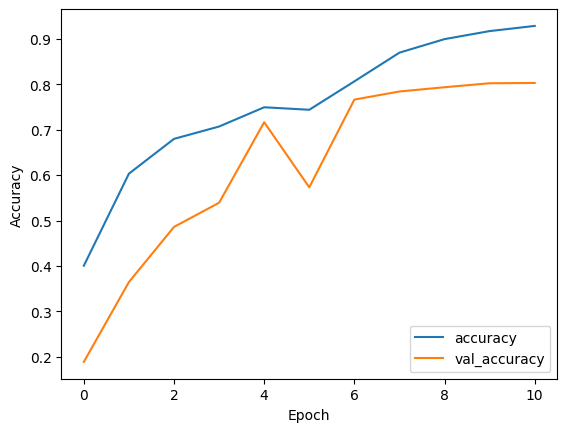

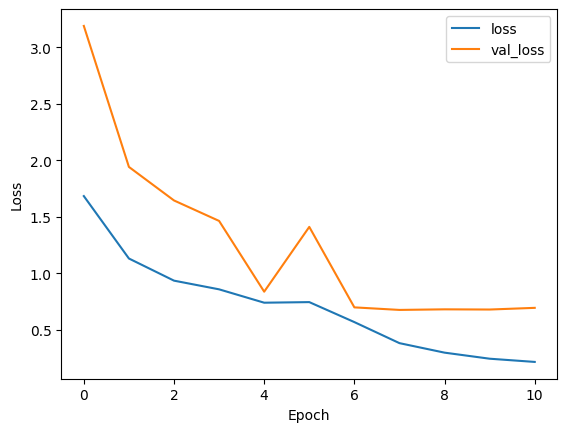

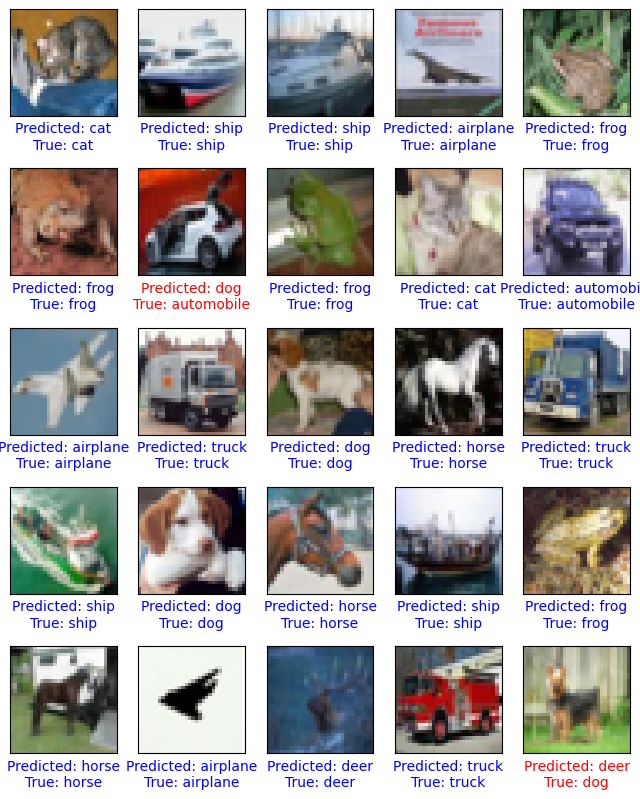

In [10]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### 모델-6

In [13]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

# 학습률 스케줄링 함수 정의
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5  # 에포크 5 이후 학습률을 절반으로 줄임
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model4.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 및 학습률 스케줄링 포함)
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping]) # 학습 스케줄링 제외

# 모델 저장
model.save('resnet50_cifar10_model4.keras')

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 68ms/step - accuracy: 0.1748 - loss: 2.5182 - val_accuracy: 0.1973 - val_loss: 2.0360
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.3373 - loss: 1.6491 - val_accuracy: 0.1759 - val_loss: 2.2992
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.5828 - loss: 1.1773 - val_accuracy: 0.2918 - val_loss: 2.7513
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.6122 - loss: 1.1169 - val_accuracy: 0.5295 - val_loss: 1.2832
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.6778 - loss: 0.9301 - val_accuracy: 0.6415 - val_loss: 1.0562
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7041 - loss: 0.8666 - val_accuracy: 0.3562 - val_loss: 2.1458
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.6942 - loss: 0.8904 - val_accuracy: 0.3494 - val_loss: 2.2123
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.5901 - loss: 1.1719 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6408 - loss: 1.0594
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
Test Loss: 1.0562450885772705
Test Accuracy: 0.6414999961853027


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

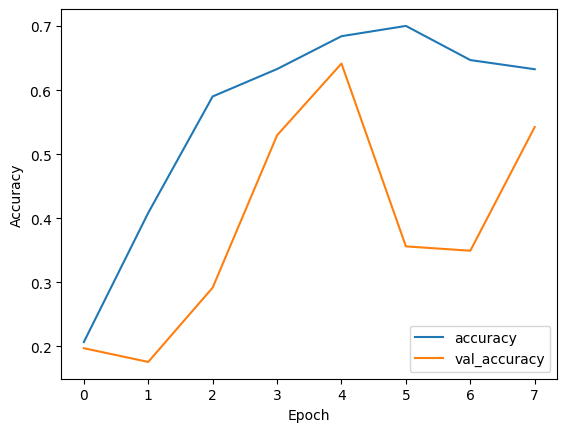

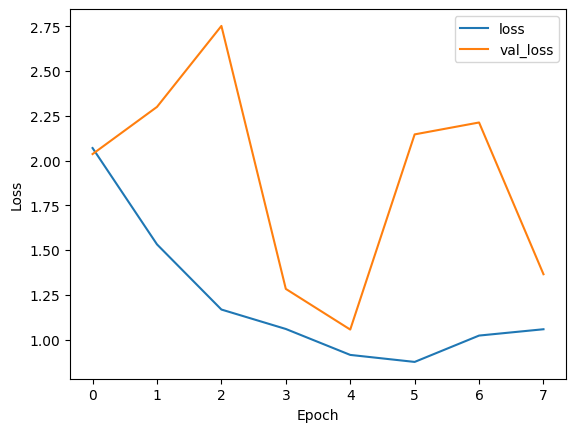

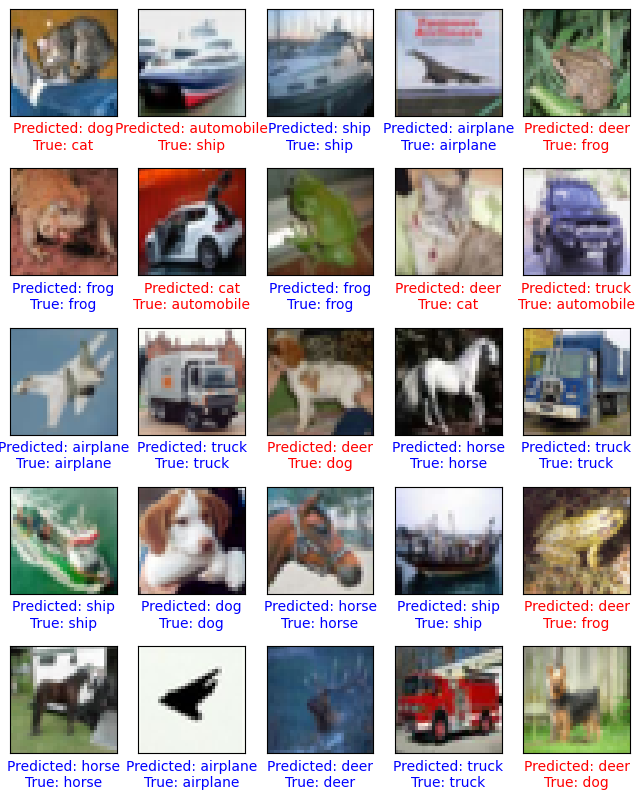

In [14]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### Dropout 0.5

In [15]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # 드롭아웃 층 추가
model.add(layers.Dense(10, activation='softmax'))

# 학습률 스케줄링 함수 정의
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5  # 에포크 5 이후 학습률을 절반으로 줄임
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model4.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 및 학습률 스케줄링 포함)
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# 모델 저장
model.save('resnet50_cifar10_model4.keras')

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 76ms/step - accuracy: 0.2181 - loss: 2.4140 - val_accuracy: 0.1675 - val_loss: 3.1755 - learning_rate: 0.0100
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.4441 - loss: 1.5317 - val_accuracy: 0.4123 - val_loss: 1.6817 - learning_rate: 0.0100
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 54ms/step - accuracy: 0.4905 - loss: 1.4205 - val_accuracy: 0.5221 - val_loss: 1.3530 - learning_rate: 0.0100
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.5799 - loss: 1.1884 - val_accuracy: 0.1000 - val_loss: 2.7053 - learning_rate: 0.0100
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.5823 - loss: 1.1830 - val_accuracy: 0.5552 - val_loss: 1.2670 - learning_rate: 0.0100
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6269 - loss: 1.0700 - val_accuracy: 0.6423 - val_loss: 1.0214 - learning_rate: 0.0100
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.6965 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7491 - loss: 0.7527
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
Test Loss: 0.748394250869751
Test Accuracy: 0.7513999938964844


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

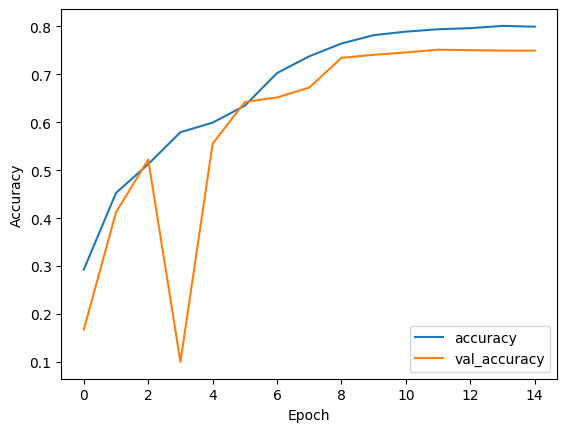

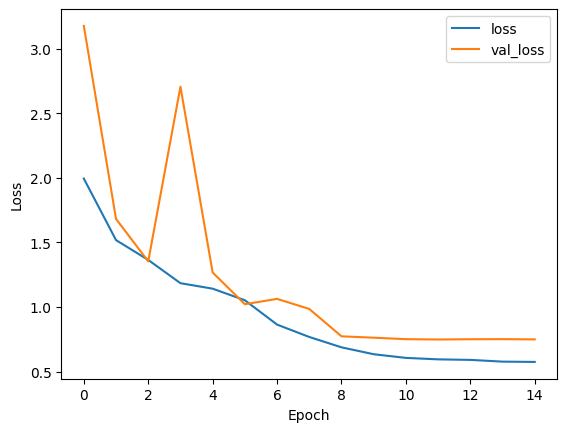

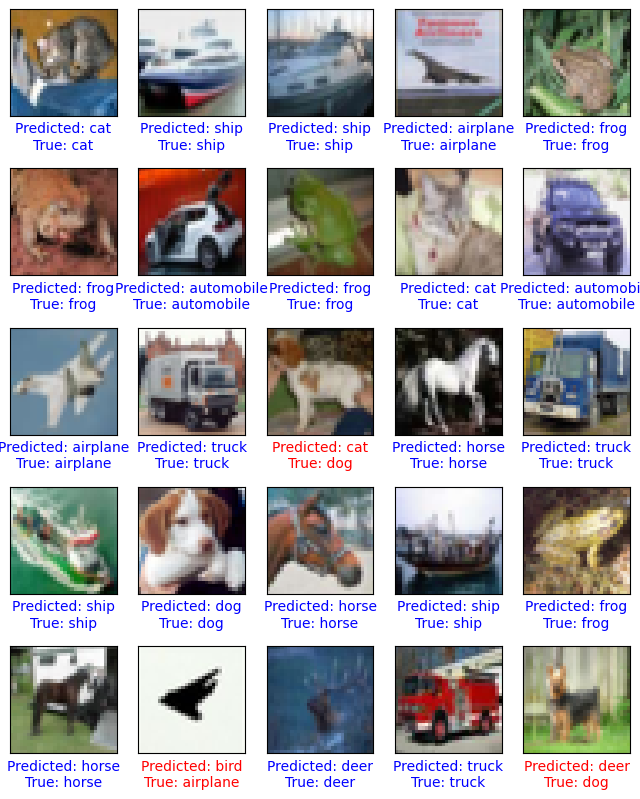

In [16]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### Dropout 0.5 + epochs 20

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # 드롭아웃 층 추가
model.add(layers.Dense(10, activation='softmax'))

# 학습률 스케줄링 함수 정의
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5  # 에포크 5 이후 학습률을 절반으로 줄임
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model4.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 및 학습률 스케줄링 포함)
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# 모델 저장
model.save('resnet50_cifar10_model4.keras')

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 111ms/step - accuracy: 0.2688 - loss: 2.3050 - val_accuracy: 0.1623 - val_loss: 2.8288 - learning_rate: 0.0100
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 94ms/step - accuracy: 0.5107 - loss: 1.3690 - val_accuracy: 0.5585 - val_loss: 1.2380 - learning_rate: 0.0100
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.6168 - loss: 1.0825 - val_accuracy: 0.5425 - val_loss: 1.4152 - learning_rate: 0.0100
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.6756 - loss: 0.9395 - val_accuracy: 0.4410 - val_loss: 1.8439 - learning_rate: 0.0100
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.6974 - loss: 0.8752 - val_accuracy: 0.6555 - val_loss: 1.0487 - learning_rate: 0.0100
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 76ms/step - accuracy: 0.6829 - loss: 0.9217 - val_accuracy: 0.6740 - val_loss: 0.9514 - learning_rate: 0.0100
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.7681 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7830 - loss: 0.7045
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
Test Loss: 0.6992301344871521
Test Accuracy: 0.7781999707221985


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

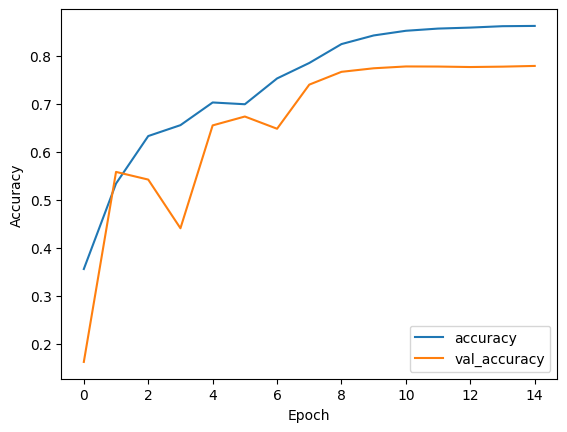

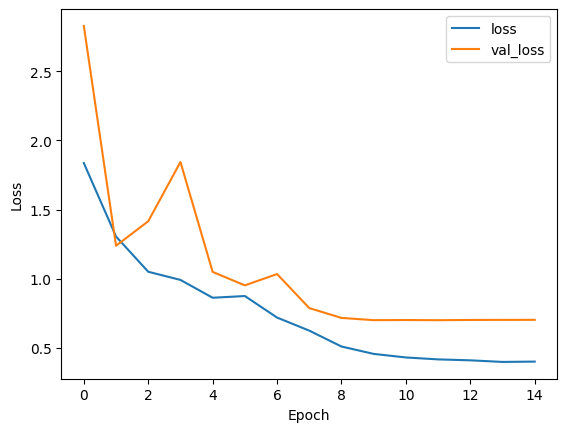

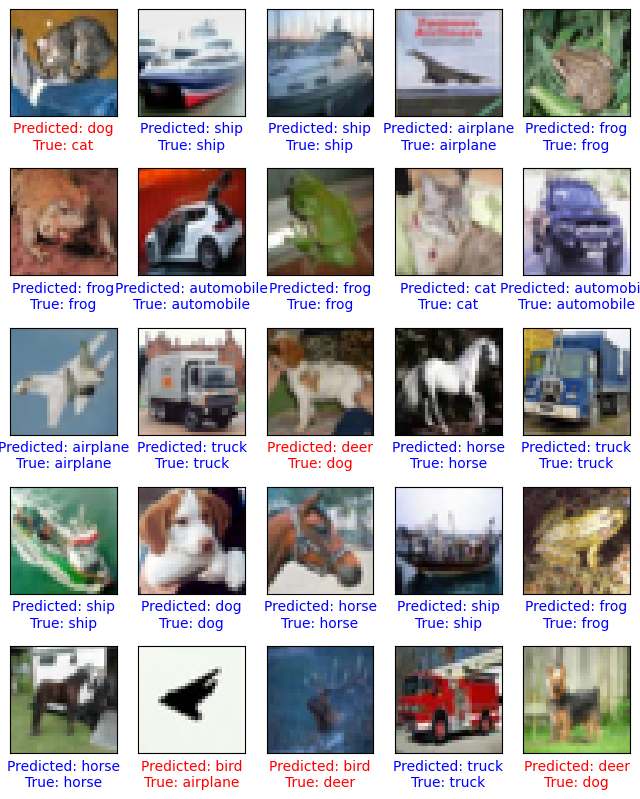

In [18]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()